In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
movies = pd.read_csv('my_movies.csv')
movies.head(5)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Preprocessing 

In [6]:
df = pd.get_dummies(movies)
df.head(10)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori algorithm

In [8]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames = True)
frequent_itemsets

/Users/najeebahamed/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, Gladiator, Patriot, V3_Sixth Sen..."
59,0.4,"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt..."
60,0.4,"(V1_Gladiator, Patriot, V3_Sixth Sense, Sixth ..."
61,0.4,"(Gladiator, V1_Gladiator, Patriot, V3_Sixth Se..."


In [9]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold= 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(V1_Gladiator, Patriot, V3_Sixth Sense, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
598,(V1_Gladiator),"(Sixth Sense, Gladiator, Patriot, V3_Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
599,(Patriot),"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
600,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V1_Gladiator, Patriot...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000


In [11]:
rules.sort_values('lift', ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
448,(V3_Sixth Sense),"(Patriot, V2_Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
82,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
253,"(Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
254,"(Patriot, Sixth Sense)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
255,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
256,"(V1_Gladiator, Sixth Sense)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
442,"(Patriot, V3_Sixth Sense)","(V2_Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
260,(V3_Sixth Sense),"(Patriot, V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
440,"(V3_Sixth Sense, Gladiator)","(Patriot, Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
217,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0


In [12]:
rules.sort_values('lift', ascending= False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
448,(V3_Sixth Sense),"(Patriot, V2_Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
82,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
253,"(Patriot, V3_Sixth Sense)","(V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
254,"(Patriot, Sixth Sense)","(V1_Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
255,"(V1_Gladiator, V3_Sixth Sense)","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
256,"(V1_Gladiator, Sixth Sense)","(Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
442,"(Patriot, V3_Sixth Sense)","(V2_Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
260,(V3_Sixth Sense),"(Patriot, V1_Gladiator, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
440,"(V3_Sixth Sense, Gladiator)","(Patriot, Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0
217,(V3_Sixth Sense),"(V1_Gladiator, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf,1.0


In [14]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(V1_Gladiator, Patriot, V3_Sixth Sense, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
598,(V1_Gladiator),"(Sixth Sense, Gladiator, Patriot, V3_Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
599,(Patriot),"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
600,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V1_Gladiator, Patriot...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000


In [15]:
rules.drop('consequents',axis=1,inplace = True)

In [16]:
rules.drop('antecedents',axis=1,inplace = True)

# Scatterplot between variables along with histograms

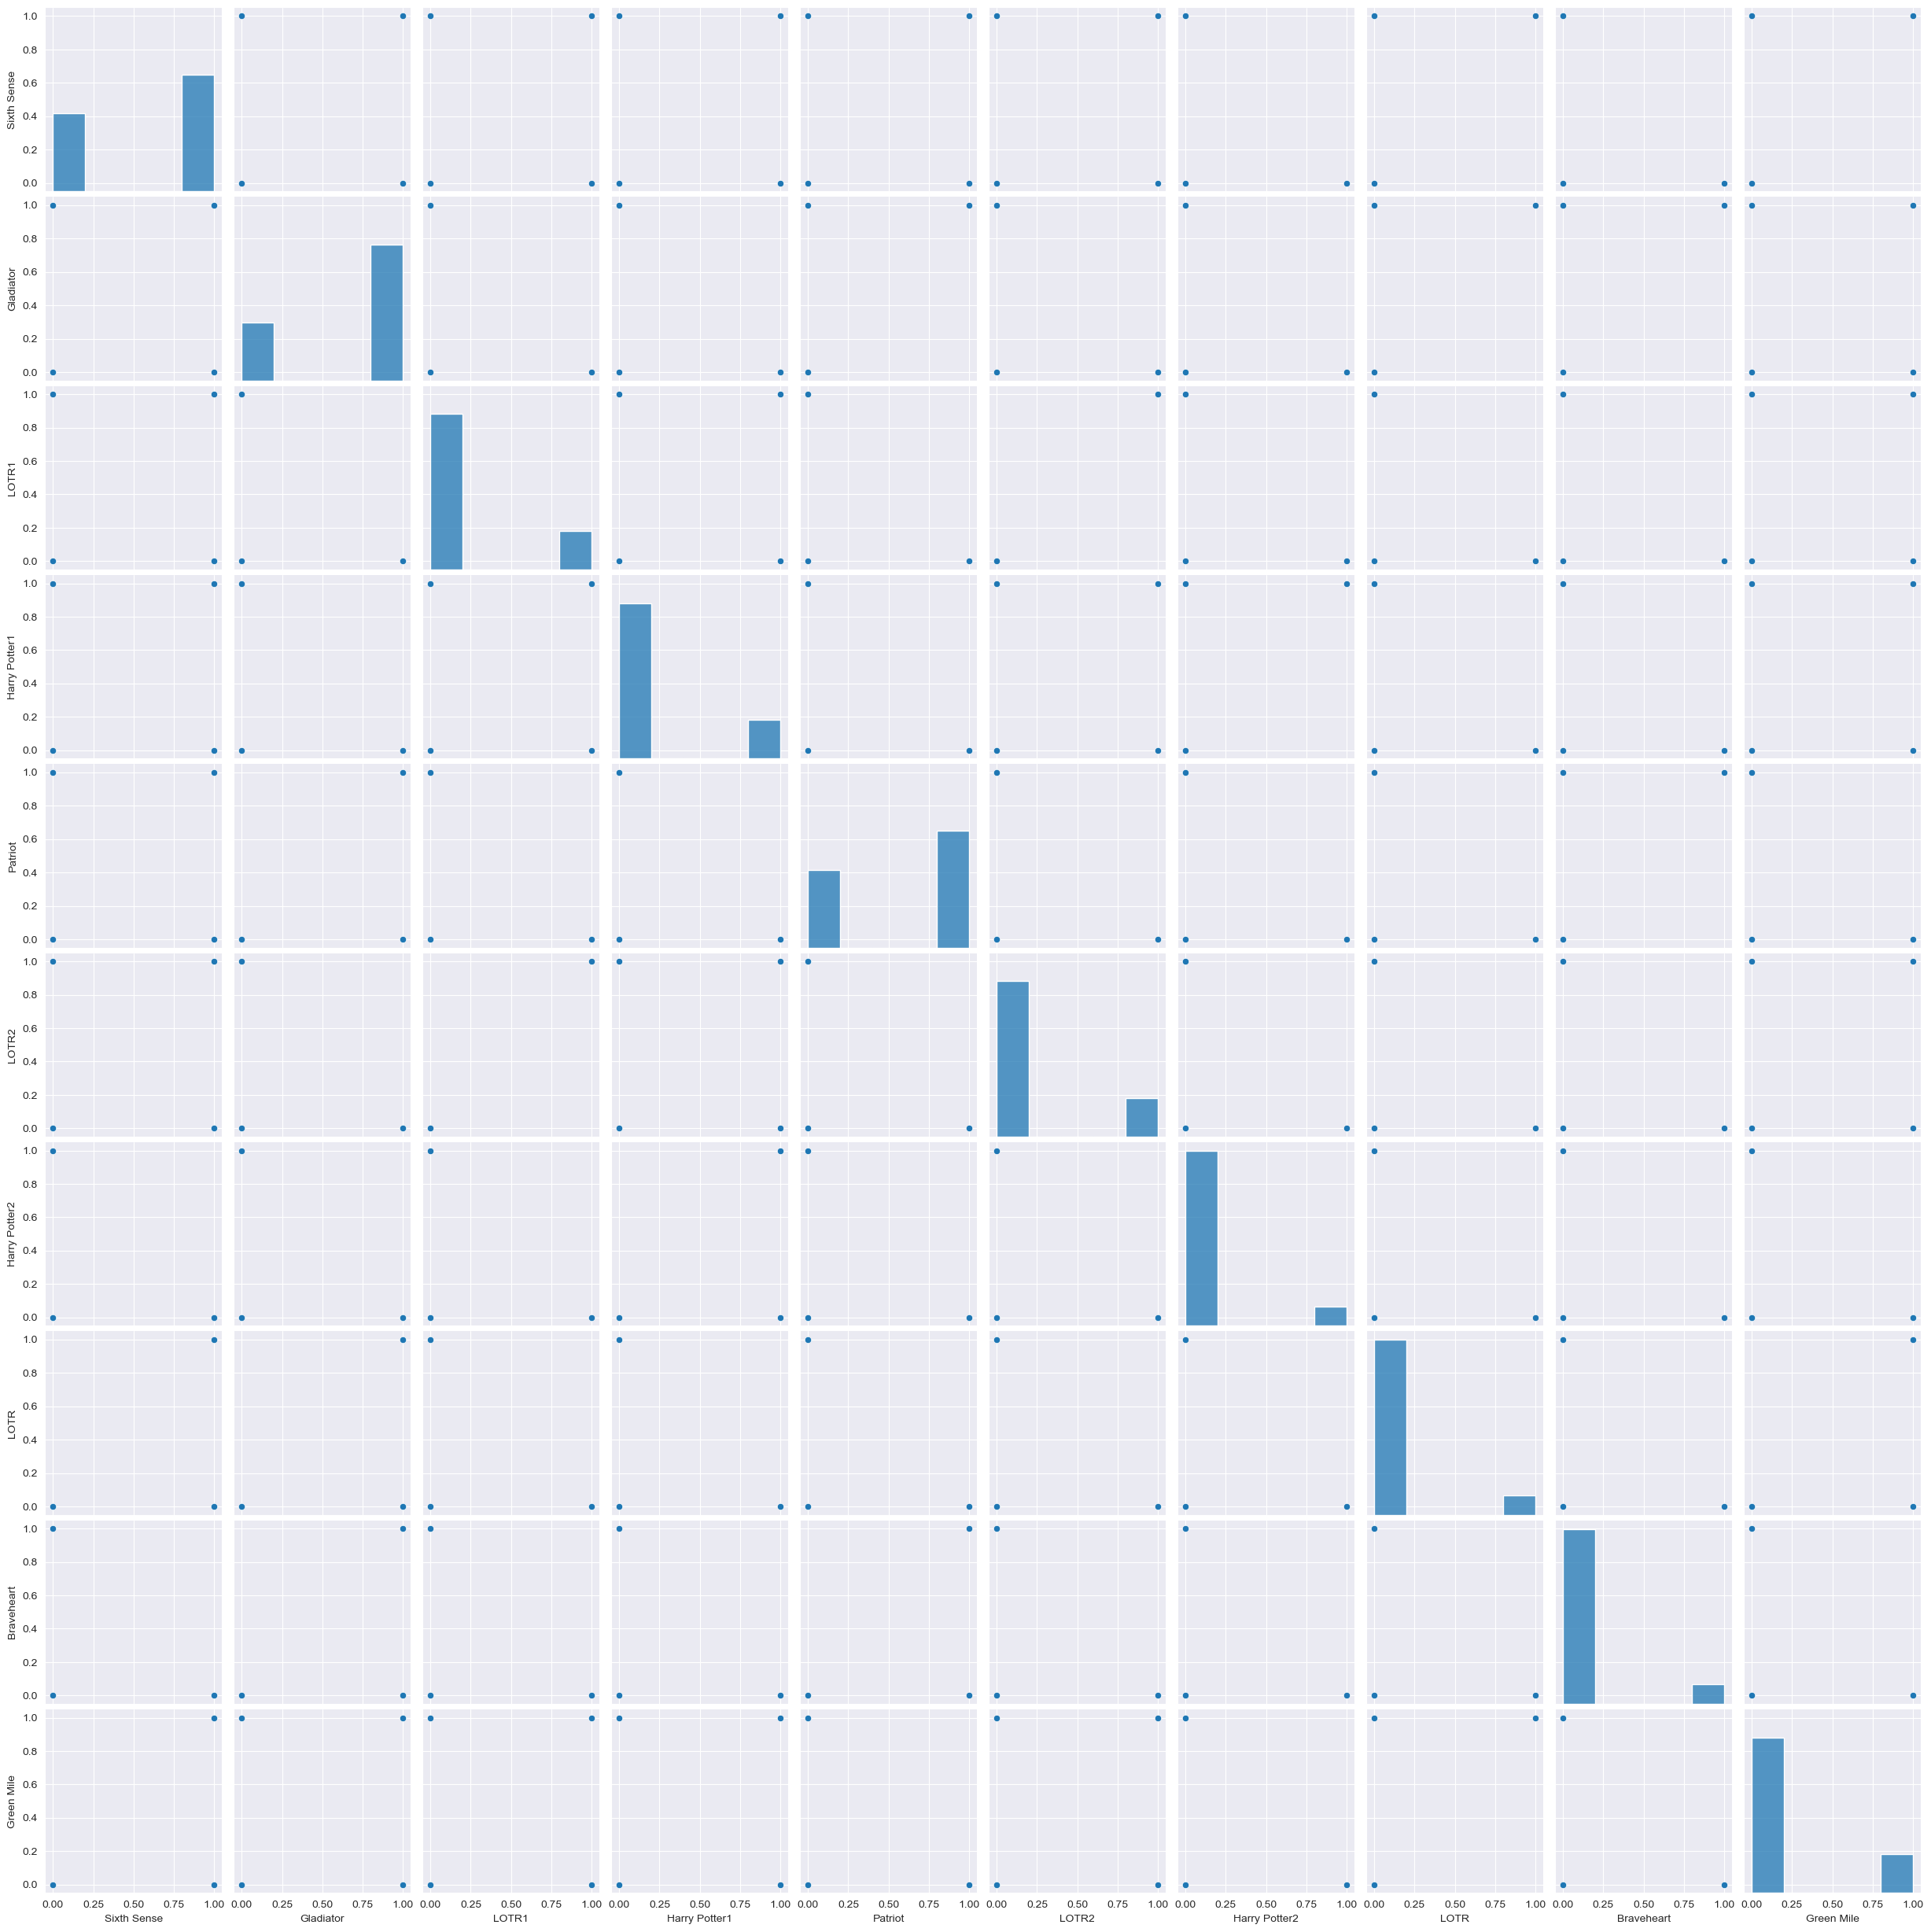

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(
    movies)

# Test for normality of residuals (Q-Q plot)

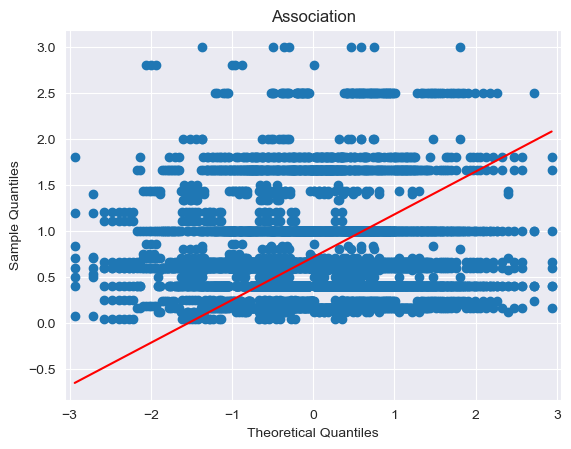

In [24]:
import statsmodels.api as sm
qqplot = sm.qqplot(rules,line='q')
plt.title('Association')
plt.show()